In [1]:
# Import libraries and packages
import numpy as np
import pandas as pd
import seaborn as sn
import os
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn import tree

from sklearn.datasets import load_iris
data = load_iris()

# Define path with .py codes containing functions used in this script
os.getcwd()
os.chdir( '../src/features')

# Import useful functions for this script  
from tracking import track

track("-"*25 + "DECISION TREE CLASSIFIER" + "-"*25)

# Reading data

#### Define path to data files

In [2]:
track("Defining path to data files")

# Define base path to data files
path = '../../temp_data/'

# Define path to the table that will be used in this project
path_clustered_data = path + 'model_data_with_clusters.csv'

# Ensure the input file exist
assert os.path.isfile(path_clustered_data), f'{path_clustered_data} not found. Is it a file?'

#### Read the files

In [3]:
# Read model_data table
track("Reading files")
clustered_data = pd.read_csv(path_clustered_data)
track("Finished reading files")

In [4]:
# Drop the column author names
data = clustered_data.iloc[:,2:len(clustered_data.columns)]

In [5]:
# Splitting Data into Training and Test sets

X_train, X_test, Y_train, Y_test = train_test_split(data.drop(labels = "clusters",axis =1), data['clusters'], random_state=0)

In [6]:
# Trying the decission tree classifer

dtc = DecisionTreeClassifier(max_depth = 3, 
                             random_state = 0)
dtc.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

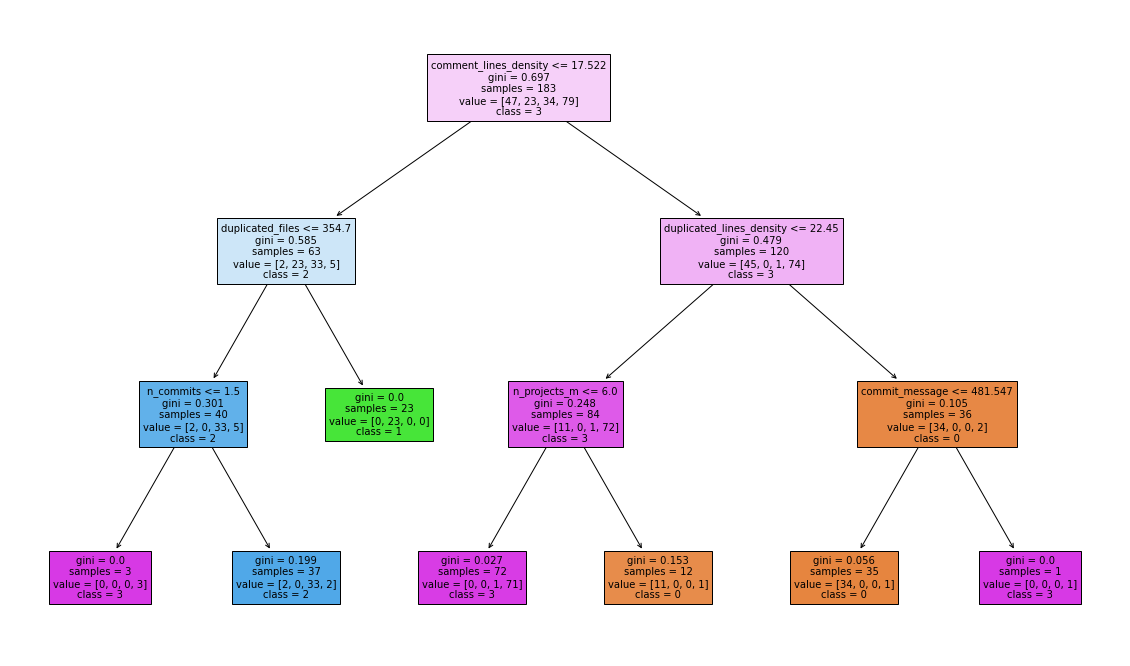

In [7]:
fn=X_train.columns
cn=[str(i) for i in range(4)]
plt.figure(figsize=(20,12)) 
tree.plot_tree(dtc,
               feature_names = fn, 
               class_names=cn,
               filled = True,
               fontsize=10);
plt.savefig('../../temp_data/imagename.png')

In [8]:
# Accuracy
pred = dtc.predict(X_test)
aux = 0
for i,x in enumerate(Y_test):
    if pred[i] == x: aux+= 1
print(aux/len(pred)*100)

91.80327868852459


In [9]:
# Now we will use random forest in order to evaluate the comparison.
rf = RandomForestClassifier(n_estimators=100,
                            random_state=0,
                            max_depth = 3)
rf.fit(X_train, Y_train)

RandomForestClassifier(max_depth=3, random_state=0)

In [10]:
# Accuracy
pred2 = rf.predict(X_test)
aux = 0
for i,x in enumerate(Y_test):
    if pred2[i] == x: aux+= 1
print(aux/len(pred2)*100)

96.72131147540983


In [11]:
def generate_confusion_heatmap(pred,gt):
    c = gt.nunique()
    #First,we create the confusion marix.
    conf_matrix = np.zeros((c,c))
    for i,x in enumerate(gt):
        conf_matrix[x][pred[i]]+=1
    for i in range(c):
        conf_matrix[i] /= sum(conf_matrix[i])
        
    ax = plt.axes()
    sn.heatmap(conf_matrix, annot=True, fmt=".3f", ax = ax)
    ax.set_title('COnfusion matrix')    

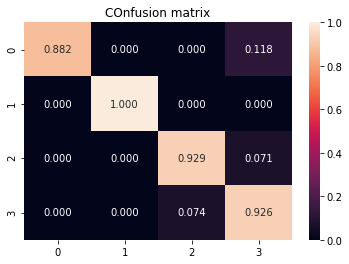

In [12]:
generate_confusion_heatmap(pred,Y_test)